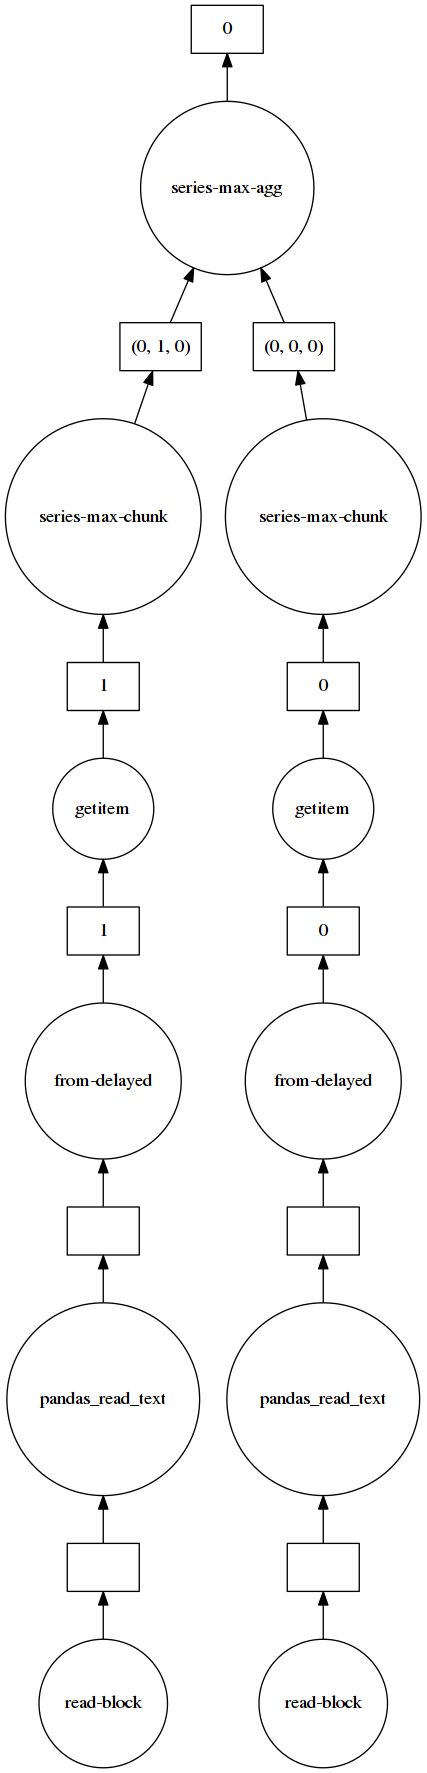

CPU times: user 1.37 s, sys: 96 ms, total: 1.46 s
Wall time: 1.16 s


28.4

In [10]:
import time
import os
import dask
import dask.dataframe as dd
import pandas as pd
from dask.distributed import Client
#c = Client()
import csv

types = {'id': str,
'name': str,
'address': str,
'age': int,
'college':str,
'degree_course':str,
'exam_score_mean': float,
'exam1':float,
'exam2':float,
'exam3':float,
'exam4':float,
'exam5':float,
'exam6':float,
'exam7':float,
'exam8':float,
'exam9':float,
'exam10':float}
filename = os.path.join('data', 'students.csv')
df = dd.read_csv(filename,dtype=types, delimiter=";", quoting=csv.QUOTE_ALL)
df.head()
df.repartit

display(df.exam_score_mean.max().visualize())
%time df.exam_score_mean.max().compute()

#sd = dd.from_pandas(df, npartitions=2)




In [5]:
future = c.scatter(df) 
ddf = dd.from_delayed([future], meta=df)#.repartition(npartitions=100)
#c.rebalance(ddf)
ddf = ddf.set_index('id')

dddf = dd.from_pandas(df, npartitions=1000)#.set_index('id')
#ddf = c.persist(sd)ddf = dd.from_delayed([future], meta=df)
#ddf = ddf.repartition(npartitions=2000).persist()
c.rebalance(ddf)
#df = dd.read_csv(filename)
for sch in ['distributed','threading', 'processes', 'sync']:
    
    max_exam_degree = dddf.exam10.max()
    if(sch == 'distributed'):
        max_exam_degree = ddf.exam10.max()
    t0 = time.time()
    max_exam_degree.compute(scheduler=sch)
    print(sch, time.time() - t0)
    #c.restart()


#largest_delay = dd.from_pandas(df, npartitions=12).set_index('id').max()
#for sch in [ ]:
#    t0 = time.time()
#    _ = largest_delay.compute(scheduler=sch)
#    print(sch, time.time() - t0)
#    
#    
#    
#    
#import pandas
#import dask.dataframe as dd
#from dask.distributed import Client#
#
#client = Client('scheduler-address:8786')#
#
#df = pd.read_csv('myfile.csv')
#future = client.scatter(df)  # send dataframe to one worker
#ddf = dd.from_delayed([future], meta=df)  # build dask.dataframe on remote data
#ddf = ddf.repartition(npartitions=20).persist()  # split
#client.rebalance(ddf)  # spread around all of your workers    
#"""

NameError: name 'c' is not defined